In [33]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/ayush/Desktop/Uni/Y3S1/AI In Accounting & Finance/Seminar 1/LoanDefault.csv")
df

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588
...,...,...,...,...
9995,No,No,711.555020,52992.37891
9996,No,No,757.962918,19660.72177
9997,No,No,845.411989,58636.15698
9998,No,No,1569.009053,36669.11236


In [3]:
#Changing categorical variables to binary notation (1,0)
df = df.replace(['Yes', 'No'], [1, 0])
df

No     9667
Yes     333
Name: default, dtype: int64

In [6]:
#Pre-processing dataset: Splitting into X and Y
X = df.iloc[:, 1:4]
Y = df.iloc[:, 0]

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default, Length: 10000, dtype: int64

In [8]:
#Running SMOTE (Oversampling)
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [13]:
#Comparing the original and new datasets
print(f"Original: {df.default.value_counts()}")
print()
print(f"New: {Y.value_counts()}")

Original: 0    9667
1     333
Name: default, dtype: int64

New: 1    9667
0    9667
Name: default, dtype: int64


In [14]:
#Getting the new dataset (By consolidating X and Y)
Z = pd.concat([X, Y], axis = 1)
Z

,student,balance,income,default
0,0,729.526495,44361.625070,0
1,1,817.180407,12106.134700,0
2,0,1073.549164,31767.138950,0
3,0,529.250605,35704.493940,0
4,0,785.655883,38463.495880,0
...,...,...,...,...
19329,0,1383.395354,53506.323091,1
19330,1,1910.041529,16934.526228,1
19331,1,1664.807024,10879.319427,1
19332,0,1671.661940,21842.380873,1


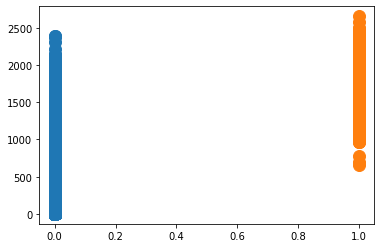

In [32]:
cat_group = df.groupby('default')
for name, group in cat_group:
    plt.plot(group.default, group.balance, marker='o', linestyle='', ms=12, label=name)

#Unable to properly add jitter in matplotlib so switching to seaborn

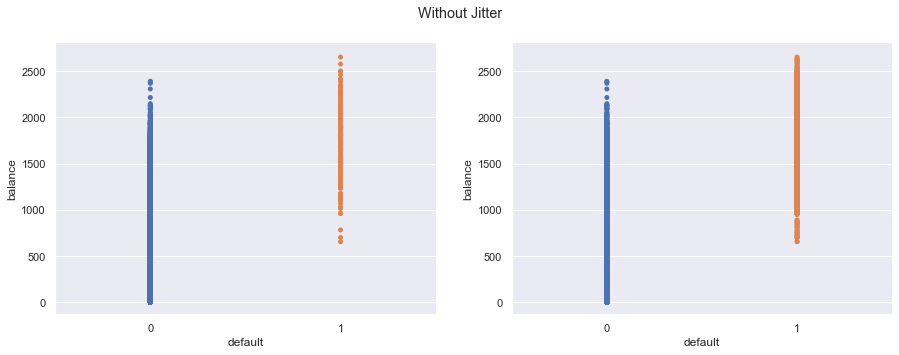

In [63]:
#Setting plot size
sns.set(rc = {'figure.figsize':(15,5)})

#Setting up side-by-side plots for before-and-after visualisation
fig, ax = plt.subplots(1,2)
fig.suptitle('Without Jitter')

#Plotting
sns.set(style = "white", color_codes=True)
sns.stripplot(x = 'default', y = 'balance', data = df, jitter = 0, size = 5, ax = ax[0])
sns.stripplot(x = 'default', y = 'balance', data = Z, jitter = 0, size = 5, ax = ax[1])
sns.despine()

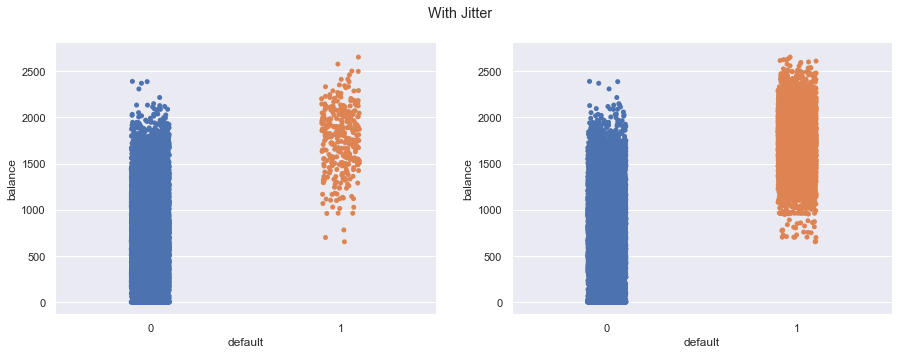

In [66]:
#Setting plot size
sns.set(rc = {'figure.figsize':(15,5)})

#Setting up side-by-side plots for before-and-after visualisation
fig, ax = plt.subplots(1,2)
fig.suptitle('With Jitter')

#Plotting
sns.set(style = "white", color_codes=True)
sns.stripplot(x = 'default', y = 'balance', data = df, jitter = True, size = 5, ax = ax[0])
sns.stripplot(x = 'default', y = 'balance', data = Z, jitter = True, size = 5, ax = ax[1])
sns.despine()

In [ ]:
#One can clearly see how the class imbalance issue has been taken care of using SMOTE oversampling!